Neural Network for Altitude-Informed Pitch Prediction 

In [289]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import random
import sys
import csv

In [347]:
with open('input_fl_12477', 'r') as file:
    content = file.readlines()

headers = content[0].split()
data = [line.split() for line in content[1:]]


selected_columns = ['altitude', 'indicated_airspeed', 'pitch', 'roll']
target_column = 'pitch'


indices = [headers.index(col) for col in selected_columns]
target_index = headers.index(target_column)


with open('output.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    
    
    writer.writerow(selected_columns + [target_column])
    
    
    for row in data:
        input_features = [row[i] for i in indices]
        target = row[target_index]
        writer.writerow(input_features + [target])

In [291]:
Original_df = pd.read_csv("output.csv")

print(Original_df.head())
print(Original_df.shape)

   altitude  indicated_airspeed  pitch  roll  pitch.1
0     848.8                 0.0   2.40  0.46     2.40
1     851.2                 0.0   2.40  0.46     2.40
2     854.2                 0.0   2.36  0.45     2.36
3     853.1                 0.0   2.41  0.47     2.41
4     853.0                 0.0   2.42  0.47     2.42
(5403, 5)


In [292]:
column_name = 'pitch.1'  
Original_df = Original_df.drop(columns=[column_name])

print(Original_df.head())
print(Original_df.shape)

   altitude  indicated_airspeed  pitch  roll
0     848.8                 0.0   2.40  0.46
1     851.2                 0.0   2.40  0.46
2     854.2                 0.0   2.36  0.45
3     853.1                 0.0   2.41  0.47
4     853.0                 0.0   2.42  0.47
(5403, 4)


In [293]:
print(Original_df.isnull().sum())

altitude              0
indicated_airspeed    0
pitch                 0
roll                  0
dtype: int64


In [294]:
print(Original_df.duplicated().sum())

5


In [295]:
Original_df.drop_duplicates(inplace=True)

In [296]:
print(Original_df.duplicated().sum())

0


In [297]:
df=Original_df

In [298]:
print(Original_df.head())

   altitude  indicated_airspeed  pitch  roll
0     848.8                 0.0   2.40  0.46
1     851.2                 0.0   2.40  0.46
2     854.2                 0.0   2.36  0.45
3     853.1                 0.0   2.41  0.47
4     853.0                 0.0   2.42  0.47


In [299]:
print(df.head())

   altitude  indicated_airspeed  pitch  roll
0     848.8                 0.0   2.40  0.46
1     851.2                 0.0   2.40  0.46
2     854.2                 0.0   2.36  0.45
3     853.1                 0.0   2.41  0.47
4     853.0                 0.0   2.42  0.47


Scaling data


In [300]:
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()

scaled_df = df

scaled_df[['altitude', 'indicated_airspeed','roll']] = scaler1.fit_transform(df[['altitude', 'indicated_airspeed','roll']])
scaled_df['pitch'] = scaler2.fit_transform(np.array(df['pitch']).reshape(df['pitch'].shape[0], 1))


print(scaled_df.head())

   altitude  indicated_airspeed     pitch      roll
0  0.004825            0.008994  0.400980  0.514426
1  0.005587            0.008994  0.400980  0.514426
2  0.006539            0.008994  0.399347  0.514262
3  0.006190            0.008994  0.401388  0.514590
4  0.006158            0.008994  0.401797  0.514590


In [336]:
X = scaled_df[['altitude', 'indicated_airspeed','roll','pitch']] # Features
y = scaled_df['pitch']  # Target variable

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

y_train, y_test = np.array(y_train).reshape(y_train.shape[0], 1), np.array(y_test).reshape(y_test.shape[0], 1)

In [337]:
# Print parameters to console
def print_parameters(iterations, learning_rate, activation_function, training_type):
    print(f"Number of Iterations: {iterations}")
    print(f"Learning Rate: {learning_rate}")
    print(f"Activation Function: {activation_function}")
    print(f"Training Type: {training_type}")

In [338]:
# Plot the cost function per iteration
def plot_cost_per_iteration(costs):
    plt.plot(range(len(costs)), costs)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost Error per Iteration')
    plt.savefig('cost_error_plot.png')
    plt.show()

Activation Functions 

In [339]:
# Activation Functions
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return np.where(z > 0, 1, 0)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return 1 - np.tanh(z) ** 2

FORWARD PROPOGATION

In [340]:
def forward_propagation(X, W1, b1, W2, b2, activation_function):
    Z1 = np.dot(X, W1) + b1
    if activation_function == 'relu':
        A1 = relu(Z1)
    elif activation_function == 'sigmoid':
        A1 = sigmoid(Z1)
    elif activation_function == 'tanh':
        A1 = tanh(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = Z2
    return A1, A2

COST FUNCTION

In [341]:
# Cost function (Mean Squared Error)
def compute_cost(y_true, y_pred):
    m = y_true.shape[0]
    cost = (1 / (2 * m)) * np.sum((y_pred - y_true) ** 2)
    return cost


BACK PROPOGATION

In [342]:
def backward_propagation(X, y, A1, A2, W2, activation_function):
    m = X.shape[0]
    dZ2 = A2 - y
    dW2 = (1 / m) * np.dot(A1.T, dZ2)
    db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)
    if activation_function == 'relu':
        dZ1 = np.dot(dZ2, W2.T) * relu_derivative(A1)
    elif activation_function == 'sigmoid':
        dZ1 = np.dot(dZ2, W2.T) * sigmoid_derivative(A1)
    elif activation_function == 'tanh':
        dZ1 = np.dot(dZ2, W2.T) * tanh_derivative(A1)
    dW1 = (1 / m) * np.dot(X.T, dZ1)
    db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)
    return dW1, db1, dW2, db2

In [343]:
# Update parameters
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

In [348]:
import numpy as np

def train_neural_network(X_train, y_train, iterations, learning_rate, activation_function, training_type):
    # Define model parameters
    input_size = X_train.shape[1]
    hidden_size = 10
    output_size = 1
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))
    costs = []

    log_file = open(f'NNTraining[{iterations}][{learning_rate}]MSE.log', 'w')

    # Train the neural network based on selected training method
    if training_type == 'stochastic':
        # Stochastic training

        for i in range(iterations):
            cost_sum = 0
            for j in range(X_train.shape[0]):
                x = X_train[j:j+1]  
                y = y_train[j:j+1]
                a1, a2 = forward_propagation(x, W1, b1, W2, b2, activation_function)
                cost = compute_cost(y, a2)
                cost_sum += cost
                dW1, db1, dW2, db2 = backward_propagation(x, y, a1, a2, W2, activation_function)
                W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
            
            average_cost = cost_sum / X_train.shape[0]
            log_file.write(f"Iteration {i+1}: MSE = {average_cost}\n")
            if i != 0 and i != 1 and average_cost > costs[-1] - costs[-1]/50:
                print("training stopped at iteration", i)
                break
            costs.append(average_cost)

    
    elif training_type == 'batch':
        # Batch training

        for i in range(iterations):
            A1, A2 = forward_propagation(X_train, W1, b1, W2, b2, activation_function)
            cost = compute_cost(y_train, A2)
            log_file.write(f"Iteration {i+1}: MSE = {cost}\n")
            if i != 0 and i != 1 and cost > costs[-1] - costs[-1]/500:
                print("training stopped at iteration", i)
                break

        
            costs.append(cost)
            
            dW1, db1, dW2, db2 = backward_propagation(X_train, y_train, A1, A2, W2, activation_function)
            W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

    else:
      print('Mistake in choosing parameter')
      cost=0

    log_file.close()
    final_cost = costs[-1] if costs else None
    with open("NNModelParameters.log", "w") as file:
     file.write(f"Learning Rate: {learning_rate}\n")
     file.write(f"Number of Iterations: {iterations}\n")
     file.write(f"Activation Function: {activation_function}\n")
     file.write(f"Training Type: {training_type}\n")   
     file.write(f"Final Error: {cost}\n")
     file.write("Neural Network Structure:\n")
     file.write(f"Input Layer: {input_size} nodes\n")
     file.write(f"Hidden Layer: {hidden_size} nodes\n")
     file.write(f"Output Layer: {output_size} nodes\n")
     file.write("Final Weights:\n")
     file.write(f"W1:\n{W1}\n")
     file.write(f"b1:\n{b1}\n")
     file.write(f"W2:\n{W2}\n")
     file.write(f"b2:\n{b2}\n")
        
    return costs


In [349]:
def train_neural_network_user_input(X_train, y_train):
    # User input
    iterations = int(input("Enter the number of iterations: "))
    learning_rate = float(input("Enter the learning rate: "))
    activation_function = input("Enter the activation function (relu, sigmoid, tanh): ")
    training_type = input("Enter the training type (stochastic or batch): ")

    print("\nSelected parameters:")
    print_parameters(iterations, learning_rate, activation_function, training_type)
    
    # Train the neural network based on user input
    cost1 = train_neural_network(X_train, y_train, iterations, learning_rate, activation_function, training_type)
    plot_cost_per_iteration(cost1)
    
    return cost1



Enter the number of iterations:  1000
Enter the learning rate:  0.01
Enter the activation function (relu, sigmoid, tanh):  relu
Enter the training type (stochastic or batch):  batch



Selected parameters:
Number of Iterations: 1000
Learning Rate: 0.01
Activation Function: relu
Training Type: batch
training stopped at iteration 469


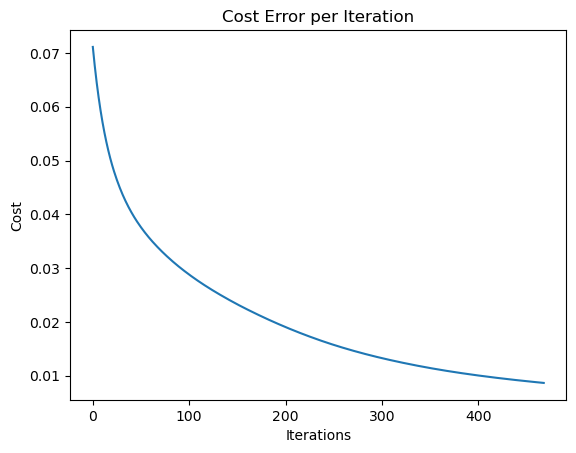

In [350]:
costarrary=train_neural_network_user_input(X_train, y_train)